In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv('iris_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
len(df['Name'].unique())

3

In [11]:
data = df[['PetalLength','PetalWidth']]

In [15]:
clf = KMeans(n_clusters=3)
pred = clf.fit(data).labels_
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [16]:
df['Name']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Name, Length: 150, dtype: object

In [17]:
df_copy = df.copy()
df_copy['Name'] = df_copy['Name'].map({'setosa':1,'versicolor':2,'virginica':0})
df_copy

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [20]:
df_success = df_copy[df_copy['Name'] == pred][['PetalLength', 'PetalWidth', 'Name']]
df_fail = df_copy[df_copy['Name'] != pred][['PetalLength', 'PetalWidth', 'Name']]

In [19]:
df_success

,PetalLength,PetalWidth,Name
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [21]:
df_fail

,PetalLength,PetalWidth,Name
77,5.0,1.7,2
83,5.1,1.6,2
106,4.5,1.7,0
119,5.0,1.5,0
126,4.8,1.8,0
138,4.8,1.8,0


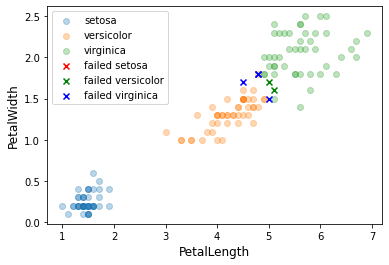

In [25]:
plt.scatter(x=df_success[df_success['Name']==1]['PetalLength'], y=df_success[df_success['Name']==1]['PetalWidth'], label='setosa', marker='o', alpha=0.3)
plt.scatter(x=df_success[df_success['Name']==2]['PetalLength'], y=df_success[df_success['Name']==2]['PetalWidth'], label='versicolor', marker='o', alpha=0.3)
plt.scatter(x=df_success[df_success['Name']==0]['PetalLength'], y=df_success[df_success['Name']==0]['PetalWidth'], label='virginica', marker='o', alpha=0.3)

plt.scatter(x=df_fail[df_fail['Name']==1]['PetalLength'], y=df_fail[df_fail['Name']==1]['PetalWidth'], label='failed setosa', marker='x', color='r')
plt.scatter(x=df_fail[df_fail['Name']==2]['PetalLength'], y=df_fail[df_fail['Name']==2]['PetalWidth'], label='failed versicolor', marker='x', color='g')
plt.scatter(x=df_fail[df_fail['Name']==0]['PetalLength'], y=df_fail[df_fail['Name']==0]['PetalWidth'], label='failed virginica', marker='x', color='b')

plt.xlabel('PetalLength', fontsize=12)
plt.ylabel('PetalWidth', fontsize=12)
plt.legend()
plt.show()